In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## importing dataset

In [2]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


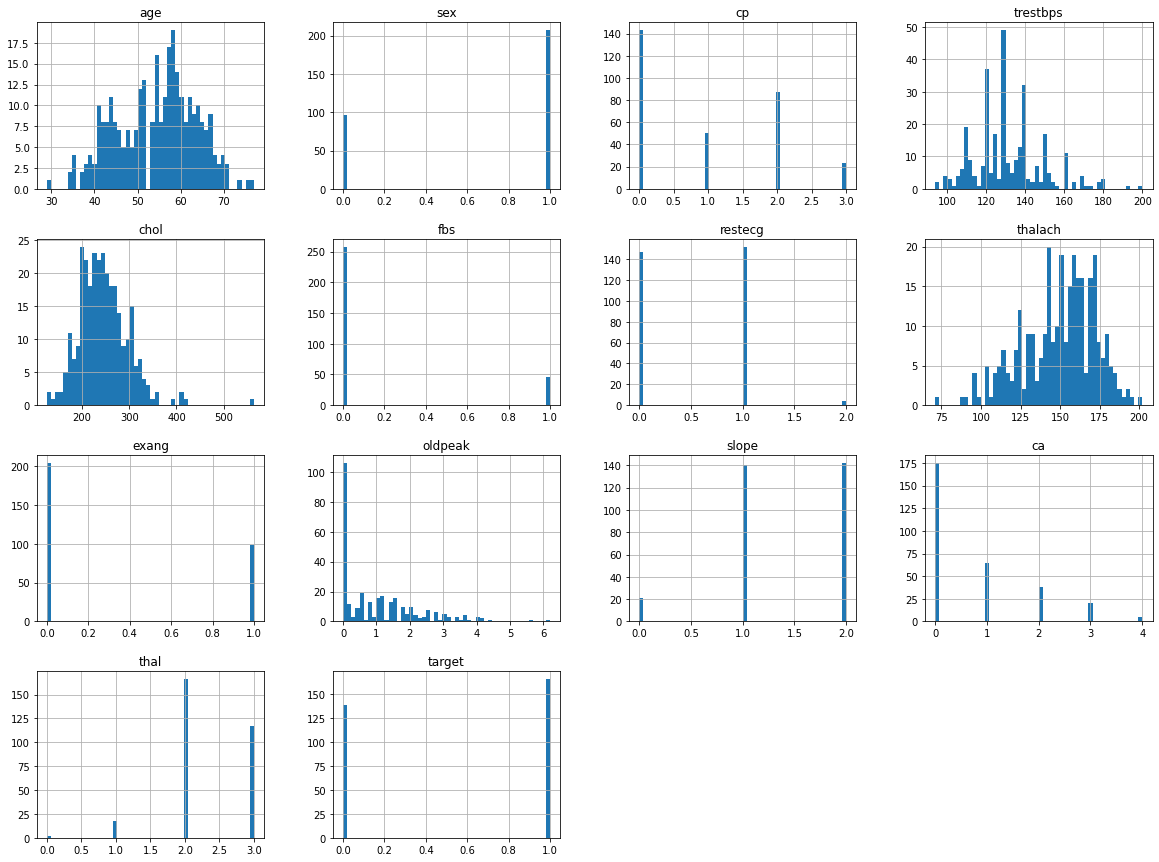

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

## Data Processing

In [5]:
X = data.drop('target',axis=1)
y = data['target']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_features = scaler.transform(X)

In [7]:
scaler_features

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_features,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
def StratifiedShuffle(params):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(data, data[f"{params}"]):
        X_train = data.loc[train_index]
        X_test = data.loc[test_index]

In [10]:
StratifiedShuffle("fbs")
StratifiedShuffle("restecg")
StratifiedShuffle("ca")
StratifiedShuffle("slope")
StratifiedShuffle("thal")

In [11]:
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='trestbps', ylabel='cp'>,
        <AxesSubplot:xlabel='chol', ylabel='cp'>,
        <AxesSubplot:xlabel='fbs', ylabel='cp'>,
        <AxesSubplot:xlabel='restecg', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>,
        <AxesSubplot:xlabel='exang', ylabel='cp'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='cp'>,
        <AxesSubplot:xlabel='thal', ylabel='cp'>],
       [<AxesSubplot:xlabel='cp', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='fbs', ylabel='trestbps'>,
        <AxesSubplot:xlabel='restecg', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='exang', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thal', ylabel='trestbps'>],
       [<AxesSubplot:x

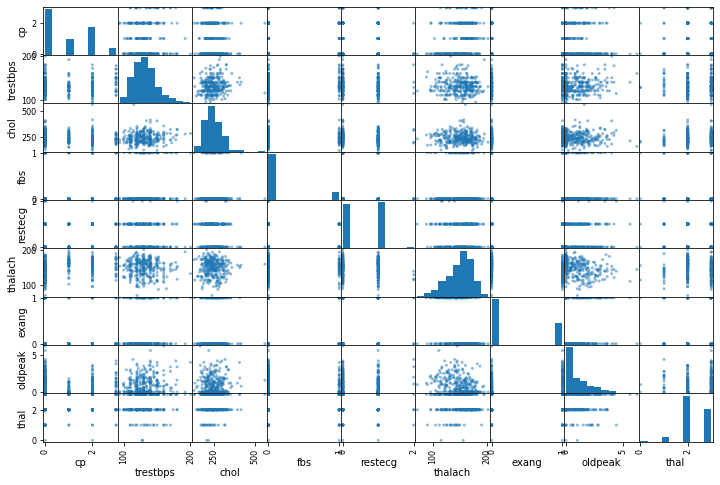

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["cp","trestbps","chol","fbs",
             "restecg","thalach","exang","oldpeak","thal"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [13]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## K Neighbors Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

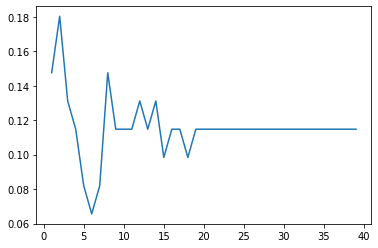

In [16]:
plt.plot(range(1,40),error_rate)

In [17]:
knn = KNeighborsClassifier(6)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
knn_Classifier_accuracy = accuracy_score(y_test,predictions)*100

[[28  1]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

0.9344262295081968


## Support Vector Classifier

In [19]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)

In [20]:
print(confusion_matrix(y_test,svc_predictions))
print(classification_report(y_test,svc_predictions))
print(accuracy_score(y_test,svc_predictions))
svc_classifier_accuracy = accuracy_score(y_test,svc_predictions)*100

[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934


## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF_error_rate = []
for i in range(1,40):
    RF_classifier = RandomForestClassifier(n_estimators=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    RF_error_rate.append(np.mean(pred!=y_test))

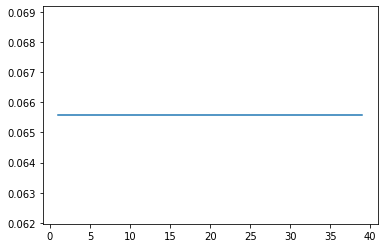

In [22]:
plt.plot(range(1,40),RF_error_rate)

In [23]:
RF_classifier = RandomForestClassifier(n_estimators=40)
RF_classifier.fit(X_train, y_train)
RF_predictions = RF_classifier.predict(X_test)

In [24]:
print(confusion_matrix(y_test,RF_predictions))
print(classification_report(y_test,RF_predictions))
print(accuracy_score(y_test,RF_predictions))
RF_Classifier_accuracy = accuracy_score(y_test,RF_predictions)*100

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918


## DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
DecisionTree_classifier_prediction = classifier.predict(X_test)  

In [27]:
print(confusion_matrix(y_test,DecisionTree_classifier_prediction))
print(classification_report(y_test,DecisionTree_classifier_prediction))
print(accuracy_score(y_test,DecisionTree_classifier_prediction))
DecisionTree_classifier_accuracy = accuracy_score(y_test,DecisionTree_classifier_prediction)*100

[[26  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

0.819672131147541


## Accuracy Table

In [28]:
from prettytable import PrettyTable
Table = PrettyTable(["Algorithm", "Accuracy"])
Table.add_row(["KNeighborsClassifier", knn_Classifier_accuracy])
Table.add_row(["RandomForestClassifier", RF_Classifier_accuracy])
Table.add_row(["DecisionTreeClassifier", DecisionTree_classifier_accuracy])
Table.add_row(["SVC", svc_classifier_accuracy])
print(Table)

+------------------------+-------------------+
|       Algorithm        |      Accuracy     |
+------------------------+-------------------+
|  KNeighborsClassifier  | 93.44262295081968 |
| RandomForestClassifier | 83.60655737704919 |
| DecisionTreeClassifier |  81.9672131147541 |
|          SVC           | 86.88524590163934 |
+------------------------+-------------------+
